# SOK-1006 V23
## Forelesning 5 - Økonomisk politikk: Avgifter

### 1. Et eksempel

En avgift er en *indirekte skatt* som pålegges kjøper eller selger av en vare eller tjeneste. Avgiften kan ta flere former, som for eksempel en avgift per enhet omsatt eller en avgift som er en andel av salgsprisen. Ett eksempel på førstnevnte er avgiften på alkohol (per liter avhengig av alkoholinnhold), og ett eksempel på sistnevnte er merverdiavgiften. I 2022 er avgiften på en 0,7L flaske vin på 41,09kr for eksempel. I Norge er avgifter regulert gjennom [Særavgiftsloven](https://lovdata.no/dokument/NL/lov/1933-05-19-11) fra 1933.

Her skal vi se på virkningen av å ilegge en vare en avgift per enhet omsatt. Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p\tag{2}
\end{equation}

I boka ser forfatterne på en avgift på 4kr per enhet som produsenten må betale. Ved hjelp av Python kan vi sette opp en mer generell modell (og eksempelet i boka blir da et spesialtilfelle av det mer generelle). Vi kan selvsagt sette opp modellen i en veldig generell form ved å bytte ut tallene i tilbud/etterspørsel med bokstaver.     

Tenk at en avgift på t kr per enhet må betales av *selgeren*. Han tar p kr per enhet fra kjøperen og av dette må t kr sendes videre til myndighetene; da får selgeren (p-t)kr per enhet solgt.     

Dersom en avgift på T kr per enhet må betales av kjøperen, må han betale p kr til selgeren pluss T kr til myndighetene, altså (p+T) kr tilsammen. Da kan vi skrive om etterspørsel og tilbud i (1) og (2):   



\begin{equation}
   x^{D}= 500 -3.2(p+T)\tag{3}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{4}
\end{equation}

La oss sette opp våre funksjoner:

In [54]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [55]:
# Etterspørsel i likning (3)

def x_d(p,T):
    return 500 - 3.2*(p+T)

#Tilbud i likning (4)

def x_s(p,t):
    return -100+4.3*(p-t)




La oss tegne eksempelet som er gitt i boka med t=4, T=0, dvs en avgift på 4 kr lagt på produsenter.

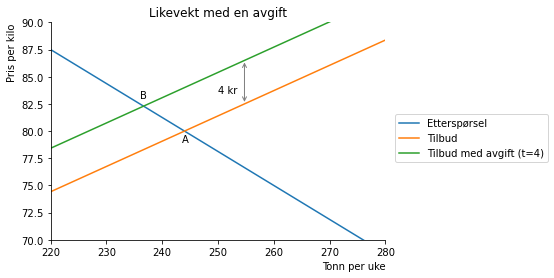

In [56]:
p_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(220,280))
                ax.set(ylim=(70,90))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 4),p_num, label='Tilbud med avgift (t=4)')

# vis avstand mellom linjene

ax.text(250, 83.5, "4 kr")

ax.annotate("", (x_s(82.5,0),82.5), (x_s(86.5,4), 86.5), arrowprops={"arrowstyle":"<->", "color":"gray"})

# Vis likevektskvantum før og etter
ax.text(243.5, 79, "A")
ax.text(236, 83, "B")

# tittel
ax.set_title('Likevekt med en avgift')

#vis navnene utenfor plottet:

ax.legend(bbox_to_anchor=(1.5,0.6));

Den opprinnelige likevekten er i A. Den nye tilbudsfunskjonen krysser etterspørsel i B og vi ser at omsatt mengde faller. Før vi beregner effekten på likevekten, la oss spørre hav som ville skjedd dersom vi hadde lagt avgiften på kjøperne (T=4)?

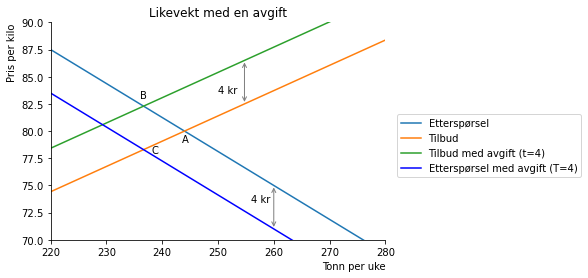

In [57]:
ax.plot(x_d(p_num,4),p_num, label='Etterspørsel med avgift (T=4)', color='blue')
ax.text(238, 78, "C")

ax.text(256, 73.5, "4 kr")

ax.annotate("", (x_d(75,0),75), (x_d(71,4), 71), arrowprops={"arrowstyle":"<->", "color":"gray"})
ax.legend(bbox_to_anchor=(1.6,0.6))
fig

Det ser ut som om omstatt kvantum blir det samme om vi ilegge avgiften kjøpere eller selgere! La oss løse for likevekten og vise dette formelt.

In [58]:
# definer symboler i sympy

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p,T),x_s(p,t))
eq_cond

Eq(-3.2*T - 3.2*p + 500, 4.3*p - 4.3*t - 100)

In [59]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

-0.426666666666667*T + 0.573333333333333*t + 80.0

In [60]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)
x_eq

-1.83466666666667*T - 1.83466666666667*t + 244.0

Legg merke til at vi ser samme tall foran T (avgift lagt på kjøper) og t (avgift lagt på selger). Det er dette vi oppdaget i figuren. En avgift på 4 kr på selger eller kjøper har samme effekt på likevektskvantumet!

In [61]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

-0.426666666666667*T + 0.573333333333333*t + 80.0

Dette ser det samme ut som før, men vi har nå laget en funksjon av t og T som vi kan plotte med numpy i matplotlib.

In [62]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

-1.83466666666667*T - 1.83466666666667*t + 244.0

In [63]:
# Kvantum omsatt med avgift på selger på t=4
x_eq_fn(4,0)

236.66133333333332

In [64]:
# Kvantum omsatt med avgift på kjøper på T=4
x_eq_fn(0,4)

236.66133333333332

Kvantum er det samme uansett hvem som må betale avgiften.

In [65]:
x_opt = round(x_eq_fn(4,0),2)
x_opt

236.66

In [66]:
# prisen som konsumenten må betale er
p_kons = round(p_eq_fn(4,0),2)
p_kons

82.29

In [67]:
# prisen som produsenten får er
p_kons -4

78.29

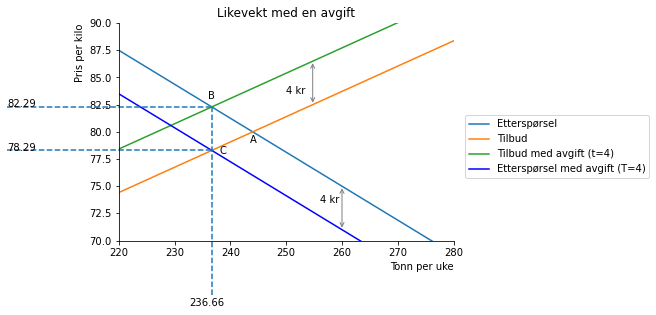

In [68]:
# sett inn linjer som viser likevekten
# clip_on=False for å tegne utenfor plottområdet

ax.vlines(x_eq_fn(4,0),65, 82.3, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,4),200,237, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(4,0),200,237, linestyles='dashed', clip_on=False)

# sett inn likevektsverdier i figuren

ax.annotate(x_opt, xy=(x_opt-4,64), annotation_clip=False)
ax.annotate(p_kons, xy=(200, p_kons), annotation_clip=False)
ax.annotate(p_kons-4, xy=(200, p_kons-4), annotation_clip=False)

ax.legend(bbox_to_anchor=(1.6,0.6))
fig

Vi ser at avgiften driver en kile mellom prisen som kjøper betaler, og det som produsenten mottar. Konsumentene betaler totalt 82.29 kr og produsentene får 78.29 kr. Forskjellen mellom disse er avgiften som betales til staten. Før avgiften ble innført var markedet i likevekt i punkt A: her betalte konsumenter `p_eq_fn(0,0)` og alt gikk til selgere.

In [69]:
p_0 = p_eq_fn(0,0)
p_0

80.0

### 2. Hvilken side av markedet betaler mest av avgiften?

Før avgiften ble innført er markedet i punkt A og prisen er altså 80 kr per kilo. Etter at avgiften på 4 kr blir innført øker prisen som konsumenter betaler med 2.29kr mens produsenter får 1.71 kr per kilo mindre betalt. Konsumenter betaler $\frac{2.29}{4}*100\%=57.25\%$ av avgiften mens produsenter betaler 42.75%. 

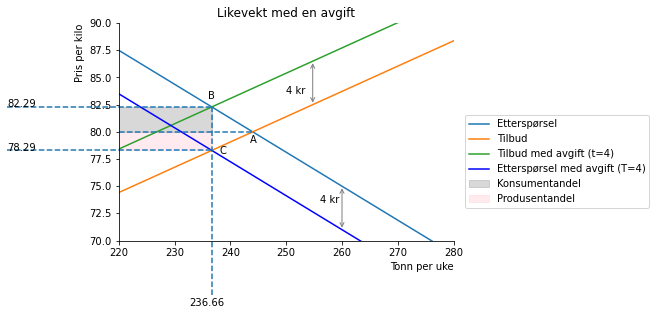

In [70]:
# vi kan illustrere hvem som betaler hva av avgiften

q=np.linspace (220, x_eq_fn(4,0), 100)


ax.hlines(p_eq_fn(0,0),220,x_eq_fn(0,0), linestyles='dashed')

ax.fill_between(q,p_kons,p_0, color = "gray",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q,p_0,p_kons-4, color = "pink",alpha = 0.3,label='Produsentandel')

ax.legend(bbox_to_anchor=(1.6,0.6))
fig

Totalt avgiftproveny til staten er summen av det rosa og det grå området i figuren. Vi ser at konsumentene betaler mest. Vi kan lage en hypotese om at det er den siden av markedet som er minst prisfølsom som vil betale mest. Hvis dette stemmer må det være tilfellet at selgere reagerer mer på prisendringer enn konsumenter, målt fra den opprinnelige likevekten.      

**Oppgave**         

*Undersøk om denne hypotesen stemmer ved å beregne priselastisitetene til tilbud og etterspørsel for pris = 80 og kvantum = 244. Forklar intuisjonen bak resultatet.*

In [ ]:
# skriv ditt svar her

### 3. En optimal avgiftssats?

Vi kan tenke oss at myndighetene har forskjellige mål med avgiftspolitikken. Vi kan beregne for eksempel avgiftssatsen som maksimerer avgiftprovenyet. I den siste figuren ser vi at avgiftproveny er avgiften per enhet multiplisert med antall enheter solgt. La oss undersøke dette for en avgift lagt på produsenten (dvs T=0). La oss først undersøke effekten som en avgift har på omsetningen.

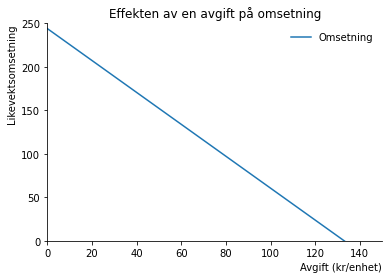

In [87]:
t_num=np.linspace(0,150,100)


fig,ax=plt.subplots()

ax.set_ylabel('Likevektsomsetning', loc = 'top')
ax.set_xlabel('Avgift (kr/enhet)', loc= 'right')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(t_num, x_eq_fn(t_num, 0),label='Omsetning')



#legend:
ax.legend(loc='best', frameon=False)

#title
ax.set_title ('Effekten av en avgift på omsetning')

ax.set_xlim(0,150)
ax.set_ylim(0,250);

Myndighetene står overfor en *avveining* her: en økning i avgiften gir flere kroner i proveny per enhet solgt, men reduserer samtidig antall enheter solgt. La oss undersøke dette næremere.

In [76]:
def avgiftprov(t):
    return t*x_eq_fn(t,0)
avgiftprov(t)

t*(244.0 - 1.83466666666667*t)

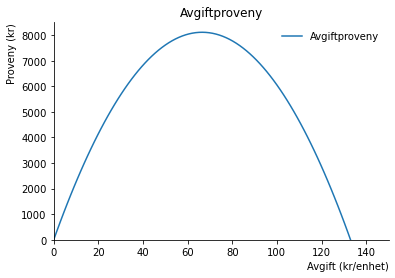

In [88]:
fig,ax=plt.subplots()

ax.set_ylabel('Proveny (kr)', loc = 'top')
ax.set_xlabel('Avgift (kr/enhet)', loc= 'right')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(t_num, avgiftprov(t_num),label='Avgiftproveny')



#legend:
ax.legend(loc='best', frameon=False)

#title
ax.set_title ('Avgiftproveny')

ax.set_xlim(0,150)
ax.set_ylim(0,8500);


Denne type kurve kalles ofte en **Laffer kurve**. (Arthur Laffer var rådgiver for US President Ronald Reagan, 1981-89). Her ser vi myndighetens avveining ganske tydelig, og vi kan også finne avgiftssatsen som maksimerer provenyet.

In [111]:
# finn maks

# deriver mhp t
d_avgpr= sp.diff(avgiftprov(t),t)

# sett = 0 og løs for t

t_opt_dict=sp.solve((d_avgpr,0),t)

t_opt = round(t_opt_dict[t],2)

t_opt



66.50

In [105]:
# maksimal avgiftproveny

maks_prov = round(avgiftprov(t_opt),2)
maks_prov

8112.65

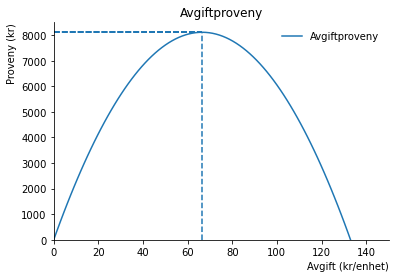

In [113]:
ax.hlines(8112.65, 0, 66.5, linestyles='dashed')
ax.vlines(66.5, 0, 8112.65, linestyles='dashed')
fig